## Importing the necessory libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

C:\Users\Zaki Hamdard\AppData\Local\Temp\ipykernel_10108\1776808933.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the Dataset

In [2]:
df = pd.read_csv("./teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Getting to know the Dataset

In [3]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("_______________________________________")

region
region
3    344
2    334
1    322
Name: count, dtype: int64
_______________________________________
tenure
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
_______________________________________
age
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
_______________________________________
marital
marital
0    505
1    495
Name: count, dtype: int64
____________________________

In [4]:
df.drop(["ed", "employ"], axis = 1, inplace = True)
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


#### Lucky enough, we do not have any missing or null values to handle.

# Exploratory Data Analysis (EDA)

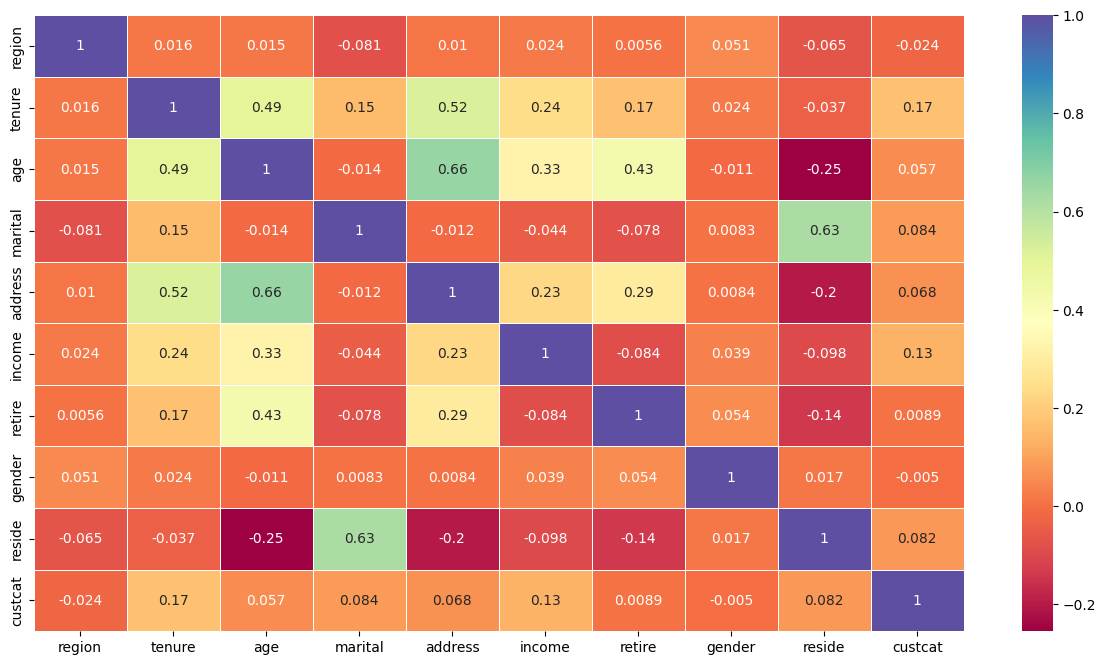

In [6]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, cmap = "Spectral")
plt.show()

#### As we can see in the heatmap, there is not any significat correlation between variable. Also, the 'retire' and 'gender' columns have almost no impact on the target variable. Thus, we can simply exclude these two columns from the dataset.

In [7]:
df.drop(["gender", "retire"], axis = 1, inplace = True)
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [8]:
new_df = df.copy()

# Here, I made a copy of my original dataset, so I can have it if I accidantally drop the columns


In [9]:
new_df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


## The 'region' and 'reside' columns are categorical. So, let's convert it to binary values of 1s and 0s.

In [10]:
region = pd.get_dummies(new_df["region"], drop_first = True, prefix = "region").astype(int)
reside = pd.get_dummies(new_df["reside"], drop_first = True, prefix = "reside").astype(int)

new_df.drop(["region", "reside"], axis = 1, inplace = True)

In [11]:
new_df = pd.concat([df, region, reside], axis = 1)
new_df.head()

,region,tenure,age,marital,address,income,reside,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,2,13,44,1,9,64.0,2,1,1,0,1,0,0,0,0,0,0
1,3,11,33,1,7,136.0,6,4,0,1,0,0,0,0,1,0,0
2,3,68,52,1,24,116.0,2,3,0,1,1,0,0,0,0,0,0
3,2,33,33,0,12,33.0,1,1,1,0,0,0,0,0,0,0,0
4,2,23,30,1,9,30.0,4,3,1,0,0,0,1,0,0,0,0


# Standardizaiton of Variables

In [12]:
from sklearn.preprocessing import StandardScaler

scaled_variable = df[["region", "tenure", "age", "income"]]
scaled_variable

,region,tenure,age,income
0,2,13,44,64.0
1,3,11,33,136.0
2,3,68,52,116.0
3,2,33,33,33.0
4,2,23,30,30.0
...,...,...,...,...
995,3,10,39,27.0
996,1,7,34,22.0
997,3,67,59,944.0
998,3,70,49,87.0


In [13]:
scaler = StandardScaler()

scaler.fit(scaled_variable)

StandardScaler()

In [14]:
scaled_variable = scaler.transform(scaled_variable)

In [15]:
df_scaled = pd.DataFrame(data = scaled_variable, columns = ["region", "tenure", "age", "income"])

df.drop(["region", "tenure", "age", "income"], axis = 1, inplace = True)



In [16]:
df = pd.concat([df, df_scaled], axis = 1)
df.head()

,marital,address,reside,custcat,region,tenure,age,income
0,1,9,2,1,-0.026968,-1.055125,0.184505,-0.126506
1,1,7,6,4,1.198836,-1.148806,-0.691812,0.546450
2,1,24,2,3,1.198836,1.521092,0.821826,0.359517
3,0,12,1,1,-0.026968,-0.118319,-0.691812,-0.416251
4,1,9,4,3,-0.026968,-0.586722,-0.930808,-0.444291


# KNN Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Let's split the data into two sets
x = df.drop(["custcat"], axis = 1)
y = df["custcat"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create the model
k = 5
knn_model = KNeighborsClassifier(n_neighbors = k)

# Fit the model 
knn_model.fit(x_train, y_train)

# test the model 
y_pred = knn_model.predict(x_test)

In [18]:
from sklearn import metrics 

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))

Accuracy score:  0.33


### We can see that the model's accuracy is pretty low. This is because there was not any significant relationship between our variables and the target, as we noted in the heatmap in the EDA section.

# Hyper Parameter Optimization with Python: to find the best combination of parameters for our model

In [19]:
from sklearn.model_selection import GridSearchCV

new_model = KNeighborsClassifier()

In [20]:
knn_params = {"n_neighbors": np.arange(1, 50),
              "metric": ["minkowski", "euclidian", "manhattan"],
              "weights": ["uniform", "distance"]
              }

In [21]:
knn_cv_model = GridSearchCV(estimator = new_model, param_grid = knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidian', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [22]:
knn_tuned_model = KNeighborsClassifier(n_neighbors = 500, metric = "manhattan", weights = "distance")
knn_tuned_model.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=500, weights='distance')

In [23]:
y_preds = knn_tuned_model.predict(x_test)
print("Accuracy after hyper paramter optimization: ", metrics.accuracy_score(y_test, y_preds))

Accuracy after hyper paramter optimization:  0.365


In [24]:

y_pred = knn_model.predict(x_test)
print("Accuracy without any hyper parameter tuning: ", metrics.accuracy_score(y_test, y_pred))

Accuracy without any hyper parameter tuning:  0.33
